In [641]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from xlrd import open_workbook
from sklearn.cluster import KMeans

# 1.   Load data

In [642]:
wb = open_workbook('dream-of-the-red-chamber-master/HongLouMeng374.xlsx')
name_event = []
name_character = []

for sheet in wb.sheets():
    number_of_rows = sheet.nrows
    number_of_columns = sheet.ncols
    for i in np.arange(1,number_of_columns):
        name_event.append((sheet.cell(0,i).value).encode('utf-8'))
    for j in np.arange(1,number_of_rows):
        name_character.append((sheet.cell(j,0).value).encode('utf-8'))

In [643]:
def get_character_name(ID_c):    
    for i in name_character[ID_c].decode('utf-8'):
        print(i,end='')
    print('\n')

In [644]:
def get_event_name(ID_e):
    for i in name_event[ID_e].decode('utf-8'):
        print(i,end='')
    print('\n')

In [645]:
# load data, totally 374 characters with 475 events
df = pd.read_excel('dream-of-the-red-chamber-master/HongLouMeng374.xlsx')
data = df.values[:,1:]
print(data.shape)
for i in np.arange(data.shape[0]):
    for j in np.arange(data.shape[1]):
        if data[i,j] != 1:
            data[i,j] = 0

(374, 475)


In [646]:
# number of characters without any event is 56
n=0
for i in np.arange(data.shape[0]):
    if np.sum(data[i,:]) == 0:
        n+=1
print(n)

56


In [647]:
# there is no event that has nobody involved
n=0
for i in np.arange(data.shape[1]):
    if np.sum(data[:,i]) == 0:
        n+=1
print(n)

0


In [648]:
# add ID to each character(row) and each event(column) so that we can get their names after erase some characters
data_org = np.concatenate((data, (np.arange(data.shape[0])).reshape(-1,1)), axis=1)
data_org = np.concatenate((data_org, (np.arange(data_org.shape[1])).reshape(1,-1)), axis=0)
data_org[-1,-1] = 0
# now the last column contains ID of each character from 0 to 373 and the last row contains ID of each event from 0 to 474
print(data_org)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 2]
 ...
 [0 0 0 ... 0 0 372]
 [0 0 0 ... 0 0 373]
 [0 1 2 ... 473 474 0]]


In [649]:
# erase those characters with less than 4 events
save_list = []
for i in np.arange(data_org.shape[0]):
    if np.sum(data_org[i,:-1]) >= 4:
        save_list.append(i)
data_org_new = data_org[save_list,:]
print(data_org_new.shape)
# final matrix with 105 characters and 475 events

(106, 476)


# 2. Preliminary analysis

## 2.1 Character

In [650]:
sum_event = np.sum(data_org_new[:-1,:-1], axis=1)
order_index = np.argsort(sum_event)[::-1] # descending order
ordered_id_character = data_org_new[order_index,-1]

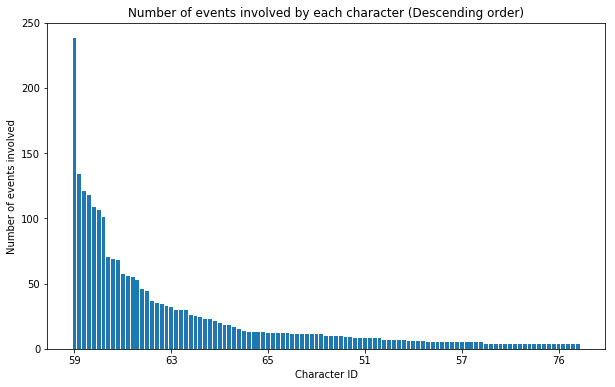

In [651]:
order_index_n = order_index
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(order_index_n.shape[0]), sum_event[order_index_n])
#ax.set_xticks(np.arange(order_index_n.shape[0]))
ax.set_xticklabels([str(i) for i in ordered_id_character])
ax.set_xlabel('Character ID')
ax.set_ylabel('Number of events involved')
ax.set_title('Number of events involved by each character (Descending order)')
#plt.axes([0,10,0,250])
plt.savefig('pictures/number_character.png')
plt.show()

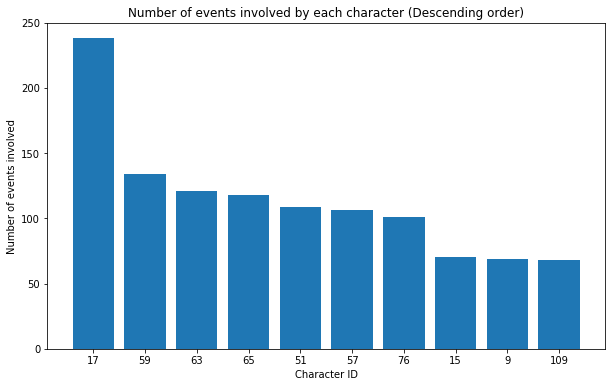

In [652]:
n = 10
order_index_n = order_index[:n]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(order_index_n.shape[0]), sum_event[order_index_n])
ax.set_xticks(np.arange(order_index_n.shape[0]))
ax.set_xticklabels([str(i) for i in ordered_id_character])

ax.set_xlabel('Character ID')
ax.set_ylabel('Number of events involved')
ax.set_title('Number of events involved by each character (Descending order)')
#plt.axes([0,10,0,250])
plt.show()

In [653]:
print(ordered_id_character[:n])
print(sum_event[order_index_n])
# they are 贾宝玉，　王熙凤，　薛宝钗，　林黛玉，　史太君，　王夫人，　袭人，　贾琏，　贾政，　平儿　

[17 59 63 65 51 57 76 15 9 109]
[238.0 134.0 121.0 118.0 109.0 106.0 101.0 70.0 69.0 68.0]


## 2.2 Event

In [654]:
sum_character = np.sum(data_org_new[:-1,:-1], axis=0)
order_index = np.argsort(sum_character)[::-1] # descending order
ordered_id_event = data_org_new[-1,order_index]

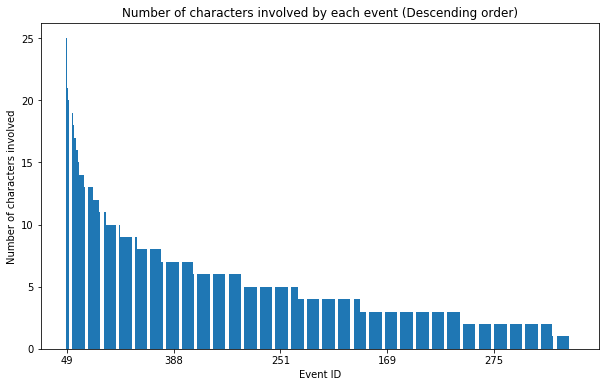

In [655]:
order_index_n = order_index
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(order_index_n.shape[0]), sum_character[order_index_n])
#ax.set_xticks(np.arange(order_index_n.shape[0]))
ax.set_xticklabels([str(i) for i in ordered_id_event])
ax.set_xlabel('Event ID')
ax.set_ylabel('Number of characters involved')
ax.set_title('Number of characters involved by each event (Descending order)')
#plt.axes([0,10,0,250])
plt.savefig('pictures/number_event.png')
plt.show()

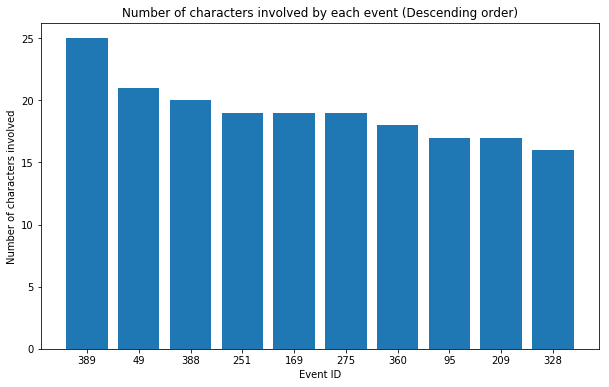

In [656]:
n = 10
order_index_n = order_index[:n]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(order_index_n.shape[0]), sum_character[order_index_n])
ax.set_xticks(np.arange(order_index_n.shape[0]))
ax.set_xticklabels([str(i) for i in ordered_id_event])

ax.set_xlabel('Event ID')
ax.set_ylabel('Number of characters involved')
ax.set_title('Number of characters involved by each event (Descending order)')
#plt.axes([0,10,0,250])
plt.show()

In [657]:
print(ordered_id_event[:n])
print(sum_character[order_index_n])
# they are 92回是否出现，　秦氏后事，　９１回是否出现，　紫娟激宝玉生病，　藕香榭聚餐，　庆生辰雅座行令，　家政升官，　搬进大观园，　众亲戚相认入住大观园，　惑奸谗抄检大观园　

[389 49 388 251 169 275 360 95 209 328]
[25.0 21.0 20.0 19.0 19.0 19.0 18.0 17.0 17.0 16.0]


# 3. PCA analysis

## 3.1 Character

In [658]:
X = data_org_new[:-1,:-1]
print(X.shape)
print(X.T.shape)

(105, 475)
(475, 105)


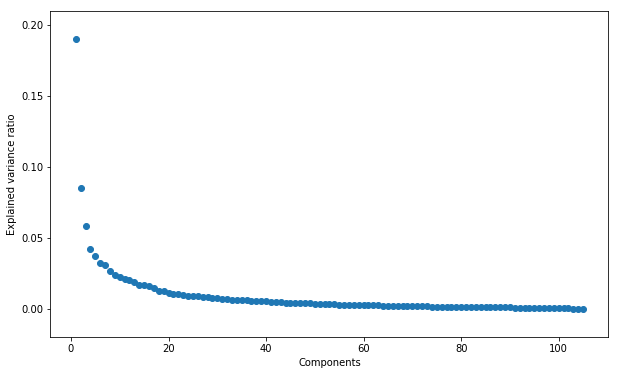

In [659]:
X_result = PCA().fit(X)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(np.arange(X_result.explained_variance_ratio_.shape[0])+1, X_result.explained_variance_ratio_)
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.savefig('pictures/ratio_c_component.png')
plt.show()

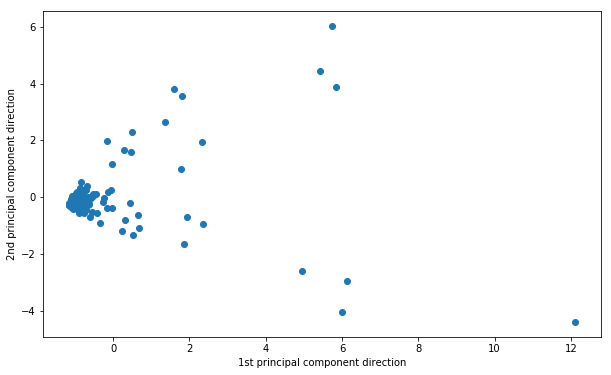

In [660]:
X_result = PCA().fit_transform(X)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_result[:,0], X_result[:,1])
ax.set_xlabel('1st principal component direction')
ax.set_ylabel('2nd principal component direction')
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.show()

### 3.1.1 1st principal component analysis

In [661]:
X_result = PCA().fit_transform(X)
#print(np.argsort(X_result[:,0])[::-1])
print('ID of characters (descending order based on their projection on 1st principal component direction):')
print(data_org_new[np.argsort(X_result[:,0])[::-1],-1])

ID of characters (descending order based on their projection on 1st principal component direction):
[17 63 65 51 59 57 76 30 9 68 54 66 60 15 109 80 31 98 14 101 29 64 67 78
 81 8 18 33 291 32 61 73 71 99 36 102 28 136 62 107 116 294 295 50 293 138
 206 210 72 55 191 255 269 74 58 90 111 117 316 185 312 113 124 34 16 276
 272 282 94 237 4 249 163 338 69 37 21 147 110 275 321 260 82 176 317 85
 139 179 165 19 311 0 318 164 93 148 166 177 77 174 271 167 203 180 175]


In [662]:
print('10 characters with the largest projection value:')
for ID in data_org_new[np.argsort(X_result[:,0])[::-1],-1][:10]:
    get_character_name(ID)

10 characters with the largest projection value:
贾宝玉

薛宝钗

林黛玉

史太君

王熙凤

王夫人

袭人

贾探春

贾政

李纨



In [663]:
print('ID of characters (descending order based on the number of events they involved):')
print(ordered_id_character)

ID of characters (descending order based on the number of events they involved):
[17 59 63 65 51 57 76 15 9 109 68 66 30 60 54 14 67 101 32 31 80 98 18 78
 61 8 64 29 73 71 33 36 81 74 291 136 50 316 110 206 99 102 163 62 69 72
 269 249 210 107 116 34 255 28 185 138 293 58 55 111 113 90 294 295 37 338
 179 191 276 165 312 147 282 272 275 177 19 16 164 148 311 117 318 4 85
 260 21 317 271 77 237 203 180 82 176 175 174 167 166 139 124 321 94 93 0]


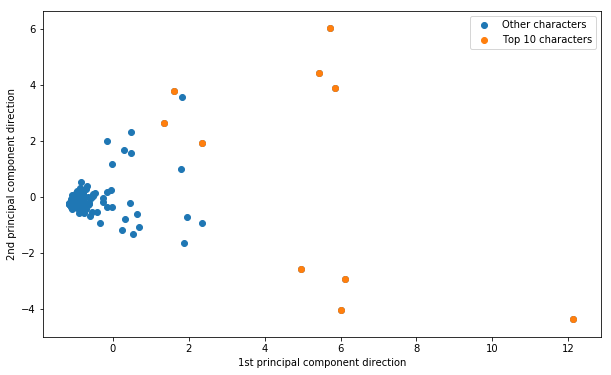

In [664]:
n = 10
l1 = [] # contains top 10 
for i,id1 in enumerate(ordered_id_character[:n]):
    for j,id2 in enumerate(data_org_new[:-1,-1]):
        if id1 == id2:
            l1.append(j)

            
X_result = PCA().fit_transform(X)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_result[:,0], X_result[:,1], label='Other characters')
ax.scatter(X_result[l1,0], X_result[l1,1], label='Top 10 characters')

ax.legend()
ax.set_xlabel('1st principal component direction')
ax.set_ylabel('2nd principal component direction')
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.savefig('pictures/1_2_pca_character.png')
plt.show()

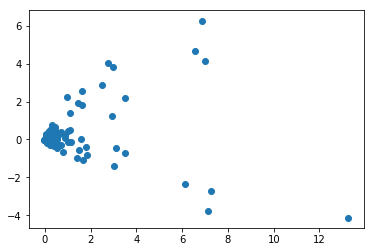

1.0000000000000002
1.0000000000000002


In [665]:
X_result = PCA().fit(X)
first = np.dot(X,X_result.components_[0,:].T)
second = np.dot(X,X_result.components_[1,:])
plt.scatter(first, second)
plt.show()
print(np.linalg.norm(X_result.components_[0,:]))
print(np.linalg.norm(X_result.components_[1,:]))

In [666]:
# above test tells us that
# pca().fit() gives us the normalized principal component vectors while pac().fit_transform() gives the initial vectors
# thus their projection values are not the same but the trend is the same

In [667]:
# analyze the effect of different events on characters
X_result = PCA().fit(X)
print('ID of events (descending order based on their absolute coefficients in the 1st principal component vector):')
print(data_org_new[-1, np.argsort(abs(X_result.components_[0,:]))[::-1]])

ID of events (descending order based on their absolute coefficients in the 1st principal component vector):
[389 317 388 406 169 144 95 187 209 99 399 93 12 235 137 13 214 177 86 232
 124 360 409 320 407 87 412 417 130 366 275 119 156 420 426 170 128 405
 215 10 400 252 251 441 127 328 197 313 49 72 91 165 162 183 352 404 316
 464 97 325 186 277 319 16 425 105 458 336 81 139 92 421 129 356 104 201
 140 435 460 318 166 207 341 14 71 116 212 408 42 253 171 422 361 161 222
 210 175 324 467 30 411 385 153 342 403 194 370 457 224 123 80 303 292 126
 213 339 199 88 184 135 305 410 111 178 136 312 430 146 427 367 122 67 231
 157 456 33 349 465 448 149 383 434 459 96 160 335 101 228 243 401 363 353
 198 327 445 50 230 351 85 424 344 469 375 220 138 31 301 233 265 32 150
 69 61 118 211 147 117 191 182 109 79 345 315 221 167 148 223 357 362 83
 311 250 152 432 373 280 343 53 52 23 34 145 163 78 110 102 43 264 37 100
 108 17 66 402 36 340 159 216 466 359 329 57 134 76 22 168 355 217 259 278
 293 

In [668]:
print('10 events with the largest absolute coefficient:')
for ID in data_org_new[-1, np.argsort(abs(X_result.components_[0,:]))[::-1]][:10]:
    get_event_name(ID)
print('their respective coefficient')
for c in X_result.components_[0,np.argsort(abs(X_result.components_[0,:]))[::-1]][:10]:
    print(c)

10 events with the largest absolute coefficient:
92回是否出现

宝玉用功练字

91回是否出现

宝玉病势加深

藕香榭聚餐

贾政怒打宝玉，众人来劝

搬进大观园

凤姐吃醋

众亲戚相认入住大观园

小红遗帕

their respective coefficient
0.12649116784212708
0.12104397349263009
0.11670131443297037
0.1150823193089571
0.11333002637632254
0.10611314395384457
0.10416562039960352
0.10410615742862736
0.10366103353542282
0.10291457707144061


In [669]:
print('10 events with the smallest absolute coefficient:')
for ID in data_org_new[-1, np.argsort(abs(X_result.components_[0,:]))[::-1]][-1:-10:-1]:
    get_event_name(ID)
for c in X_result.components_[0,np.argsort(abs(X_result.components_[0,:]))[::-1]][-1:-10:-1]:
    print(c)

10 events with the smallest absolute coefficient:
金哥儿投河殉情

十章一 金荣家

贾母大寿，抄写佛经

刘姥姥又见巧平儿

聚会聊天

贾琏贾芹对质，跟赖大求情

下恩旨

婚娶

鸳鸯撞见司琪幽会

-9.521950326444711e-19
3.5265189760111956e-18
3.471507966721413e-05
-0.0003868780563261722
-0.0005847774311787384
-0.0006117180181388037
0.0007267106302141835
-0.0007320449873477149
-0.0007977450795553807


In [670]:
print('ID of events (descending order based on the number of characters they involved):')
print(ordered_id_event)

ID of events (descending order based on the number of characters they involved):
[389 49 388 251 169 275 360 95 209 328 426 10 112 312 320 317 336 16 361
 170 12 399 230 214 406 177 13 99 464 97 425 469 93 465 232 400 311 252
 405 366 94 266 98 14 86 313 212 329 144 184 42 325 50 333 341 72 60 319
 363 458 166 235 448 215 187 201 335 327 228 455 199 339 447 383 220 452
 38 356 234 124 87 243 256 407 298 468 362 420 105 183 332 171 282 323 137
 210 324 279 316 229 231 128 293 259 270 272 161 417 461 403 409 441 46
 385 375 450 404 370 470 260 386 222 224 225 277 130 424 45 318 233 219
 101 314 435 127 115 125 91 408 299 253 104 466 263 217 157 153 355 181
 152 69 186 460 267 197 198 71 342 456 207 454 412 213 22 449 31 30 27 274
 119 422 368 421 367 17 120 165 167 467 175 156 462 194 457 453 135 445
 444 440 438 436 239 15 246 247 226 111 278 290 401 81 48 331 381 307 305
 64 162 352 411 353 359 96 347 344 350 340 66 11 322 349 139 348 178 140
 442 221 57 392 202 203 51 354 459 379 451 

### 3.1.2 2nd principal component analysis

In [671]:
X_result = PCA().fit_transform(X)
print('ID of characters (descending order based on their projection on 2nd principal component direction):')
print(data_org_new[np.argsort(X_result[:,1])[::-1],-1])

ID of characters (descending order based on their projection on 2nd principal component direction):
[59 57 51 15 66 109 14 32 9 67 101 8 60 316 293 34 111 206 18 37 33 321
 249 36 74 58 102 147 318 255 28 50 269 317 61 62 55 148 19 110 21 4 272
 69 311 73 16 117 29 203 90 176 210 0 338 116 294 185 167 175 180 271 237
 260 179 295 93 177 77 174 276 164 82 139 113 275 166 282 312 191 81 85
 291 163 124 165 138 136 99 94 72 31 107 68 64 71 30 80 78 98 54 76 63 65
 17]


In [672]:
print('10 characters with the largest projection value:')
for ID in data_org_new[np.argsort(X_result[:,1])[::-1],-1][:10]:
    get_character_name(ID)

10 characters with the largest projection value:
王熙凤

王夫人

史太君

贾琏

邢夫人

平儿

贾珍

贾蓉

贾政

尤氏



In [673]:
print('10 characters with the smallest projection value:')
for ID in data_org_new[np.argsort(X_result[:,1])[::-1],-1][-1:-10:-1]:
    get_character_name(ID)

10 characters with the smallest projection value:
贾宝玉

林黛玉

薛宝钗

袭人

史湘云

紫鹃

晴雯

麝月

贾探春



In [674]:
# analyze the effect of different events on characters
X_result = PCA().fit(X)
print('ID of events (descending order based on their absolute coefficients in the 2nd principal component vector):')
print(data_org_new[-1, np.argsort(abs(X_result.components_[1,:]))[::-1]])

ID of events (descending order based on their absolute coefficients in the 2nd principal component vector):
[312 199 311 230 184 425 313 336 293 329 220 49 170 198 353 42 447 60 69
 233 442 260 455 319 381 275 201 339 405 212 94 441 356 162 165 316 183 46
 64 440 298 210 383 125 318 187 12 166 222 450 403 139 92 207 363 86 87 45
 407 409 234 111 367 320 174 419 62 439 63 395 96 252 411 116 410 457 136
 378 253 385 97 178 72 408 444 157 289 215 361 123 292 303 80 438 468 461
 426 30 122 67 88 352 456 50 296 197 454 309 434 85 314 332 217 427 430
 146 282 323 458 301 22 32 150 192 195 167 443 386 152 279 181 14 206 221
 315 335 366 37 373 278 436 380 424 180 266 354 110 306 273 89 446 216 171
 138 223 44 310 350 466 307 79 191 182 211 109 118 147 117 345 61 264 397
 74 31 382 10 452 48 404 359 445 90 294 280 388 213 322 243 219 357 159
 358 465 208 392 126 83 432 235 453 338 343 402 226 134 76 460 368 129 156
 188 190 91 163 78 145 34 23 228 328 71 270 108 100 161 168 218 82 95 196
 153 

In [675]:
print('10 events with the largest absolute coefficient:')
for ID in data_org_new[-1, np.argsort(abs(X_result.components_[1,:]))[::-1]][:10]:
    get_event_name(ID)
for c in X_result.components_[1,np.argsort(abs(X_result.components_[1,:]))[::-1]][:10]:
    print(c)

10 events with the largest absolute coefficient:
贾琏纳秋桐为妾

众人斗牌哄贾母高兴

挑唆张华

春祭恩赏（五十三）

凤姐生日凑钱

散余资贾母明大义复世职政老沐天恩

尤二姐吞金

?

送殡

矢孤介杜绝宁国府

0.14962810058985115
0.13896860652494705
0.1351960121090917
0.13328951785446594
0.12436917106559241
0.11982068810630979
0.11700946041643057
0.1161478804812862
0.11184354712172184
0.11114386363993216


In [676]:
print('10 events with the smallest absolute coefficient:')
for ID in data_org_new[-1, np.argsort(abs(X_result.components_[1,:]))[::-1]][-1:-10:-1]:
    get_event_name(ID)
for c in X_result.components_[1,np.argsort(abs(X_result.components_[1,:]))[::-1]][-1:-10:-1]:
    print(c)

10 events with the smallest absolute coefficient:
金哥儿投河殉情

十章一 金荣家

聚会聊天

红玉偶遇贾芸

甄夫人见宝玉

花袭人借机问月钱

宝玉向芳官询问藕官的事

赶走司棋

红玉和佳蕙聊天

-7.043278372218398e-19
-2.9371658284584634e-18
-0.00018450389764038258
0.00018581451039578886
0.00031881675238403987
0.0003380441382487399
-0.00036439148676443333
-0.00046372640135040156
-0.0005012527634693484


In [677]:
X_result.components_[1,np.argsort(abs(X_result.components_[1,:]))[::-1]]

array([ 1.49628101e-01,  1.38968607e-01,  1.35196012e-01,  1.33289518e-01,
        1.24369171e-01,  1.19820688e-01,  1.17009460e-01,  1.16147880e-01,
        1.11843547e-01,  1.11143864e-01,  1.08580125e-01,  1.08125922e-01,
       -1.07664185e-01,  1.05711548e-01,  1.02435189e-01,  1.02063066e-01,
        1.01810283e-01,  1.00706983e-01,  9.87733540e-02,  9.31166333e-02,
        9.20763671e-02,  9.12402720e-02,  9.06329187e-02, -8.96087079e-02,
        8.80372331e-02, -8.79551859e-02,  8.55404011e-02,  8.55379713e-02,
        8.51591178e-02, -8.44219928e-02,  8.16570590e-02,  8.07791810e-02,
        8.05611947e-02, -8.04918236e-02, -8.04918236e-02, -7.98795008e-02,
       -7.89472195e-02,  7.85722678e-02,  7.63488735e-02,  7.61979888e-02,
        7.55573126e-02, -7.55419474e-02, -7.52574386e-02,  7.50606537e-02,
       -7.49779507e-02,  7.46241334e-02,  7.43955622e-02, -7.37271702e-02,
       -7.34930994e-02,  7.20790147e-02, -7.20689542e-02, -7.19796999e-02,
       -7.19796999e-02, -

## 3.2 Event

In [678]:
X = data_org_new[:-1,:-1]
print(X.shape)
print(X.T.shape) # n_events * n_characters

(105, 475)
(475, 105)


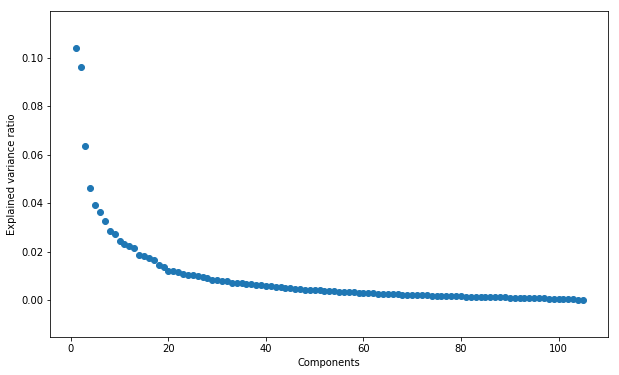

In [679]:
# focus on events seperation
X_result = PCA().fit(X.T)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(np.arange(X_result.explained_variance_ratio_.shape[0])+1, X_result.explained_variance_ratio_)
ax.set_xlabel('Components')
ax.set_ylabel('Explained variance ratio')
#ax.set_title('')
#plt.axis([0,110,0,0.15])
plt.savefig('pictures/ratio_e_component.png')
plt.show()

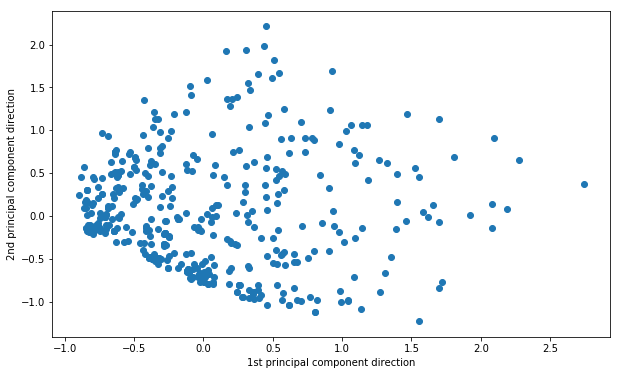

In [680]:
# each point represents an event
X_result = PCA().fit_transform(X.T)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_result[:,0], X_result[:,1])
ax.set_xlabel('1st principal component direction')
ax.set_ylabel('2nd principal component direction')
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.show()

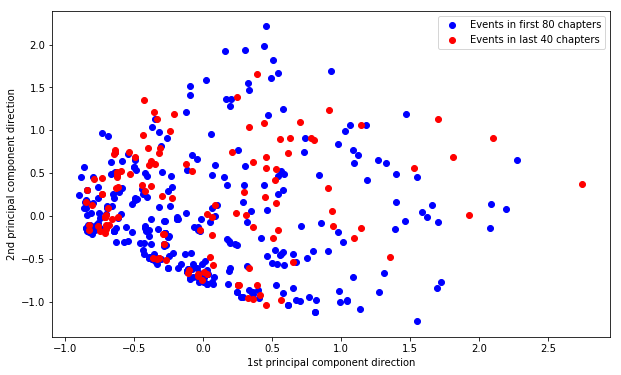

In [681]:
# each point represents an event
X_result = PCA().fit_transform(X.T)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_result[[i for i in range(X_result.shape[0]) if i < 350],0], X_result[[i for i in range(X_result.shape[0]) if i < 350],1], c='b', label='Events in first 80 chapters')
ax.scatter(X_result[[i for i in range(X_result.shape[0]) if i >= 350],0], X_result[[i for i in range(X_result.shape[0]) if i >= 350],1], c='r', label='Events in last 40 chapters')

ax.set_xlabel('1st principal component direction')
ax.set_ylabel('2nd principal component direction')
ax.legend()
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.savefig('pictures/80_40.png')
plt.show()

# From PCA we cannot seperate events in first 80 chapters from the whole

### 3.2.1 1st principal component analysis

In [682]:
X_result = PCA().fit_transform(X.T)
#print(np.argsort(X_result[:,0])[::-1])
print('ID of events (descending order based on their projection on 1st principal component direction):')
print(data_org_new[-1,np.argsort(X_result[:,0])[::-1]])

ID of events (descending order based on their projection on 1st principal component direction):
[389 169 317 388 209 95 406 360 86 214 426 275 13 93 99 170 144 399 12 177
 232 137 251 366 235 215 87 16 124 187 361 417 319 328 464 325 72 10 320
 183 316 252 128 212 166 14 130 420 412 49 405 400 127 119 156 318 165 162
 409 105 407 207 91 97 197 341 210 441 171 222 460 277 253 385 352 139 92
 129 153 339 186 104 116 403 81 161 140 411 71 336 422 135 152 421 30 404
 175 362 184 467 213 313 201 224 228 383 458 469 312 435 327 356 230 324
 457 111 157 425 456 370 367 465 178 292 80 303 123 112 198 363 88 445 410
 220 342 216 448 243 199 401 231 349 136 96 434 332 427 430 146 160 67 122
 353 375 33 408 69 305 282 233 149 31 85 331 101 42 311 126 194 365 259
 335 138 350 301 343 459 167 351 344 234 340 368 206 83 150 32 466 428 329
 266 110 432 223 221 315 37 168 373 147 345 211 117 118 191 109 182 79 61
 17 36 470 159 22 359 239 102 357 264 217 208 250 190 280 50 219 424 272
 60 278 279 293 

In [683]:
print('10 events with the largest projection value:')
for ID in data_org_new[-1, np.argsort(X_result[:,0])[::-1]][:10]:
    get_event_name(ID)
    
print('10 events with the smallest projection value:')
for ID in data_org_new[-1, np.argsort(X_result[:,0])[::-1]][-1:-10:-1]:
    get_event_name(ID)

10 events with the largest projection value:
92回是否出现

藕香榭聚餐

宝玉用功练字

91回是否出现

众亲戚相认入住大观园

搬进大观园

宝玉病势加深

贾政升官

林黛玉追打史湘云

芦雪庵联诗

10 events with the smallest projection value:
？

讨银

贾母瞧病

？

下恩旨

婚娶

刘姥姥又见巧平儿

？

？



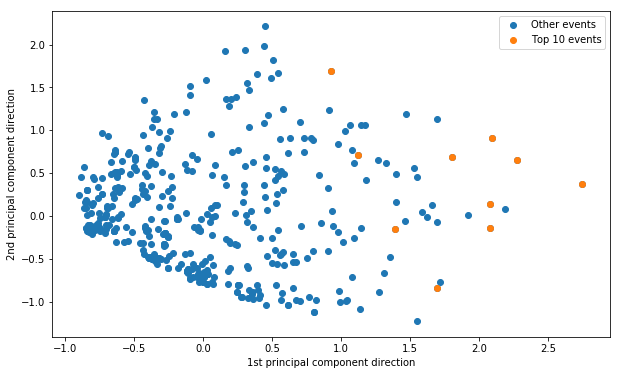

In [684]:
n = 10
l1 = [] # contains top 10 
for i,id1 in enumerate(ordered_id_event[:n]):
    for j,id2 in enumerate(data_org_new[-1,:-1]):
        if id1 == id2:
            l1.append(j)

            
X_result = PCA().fit_transform(X.T)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_result[:,0], X_result[:,1], label='Other events')
ax.scatter(X_result[l1,0], X_result[l1,1], label='Top 10 events')

ax.legend()
ax.set_xlabel('1st principal component direction')
ax.set_ylabel('2nd principal component direction')
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.savefig('pictures/1_2_pca_event.png')
plt.show()

# from here we can see the 1st pcd mainly distinguish those main characters involving in more events

In [685]:
# analyze the effect of different characters on events
X_result = PCA().fit(X.T)
print('ID of characters (descending order based on their absolute coefficients in the 1st principal component vector):')
print(data_org_new[np.argsort(abs(X_result.components_[0,:]))[::-1],-1])

ID of characters (descending order based on their absolute coefficients in the 1st principal component vector):
[17 63 65 51 57 76 30 54 59 68 60 29 66 31 64 9 98 80 291 81 78 294 32 295
 101 99 28 62 33 102 74 107 116 110 71 69 124 249 316 293 117 8 67 15 94
 16 73 203 14 175 180 55 191 163 148 90 34 109 318 272 138 177 19 237 271
 312 179 61 4 164 77 167 50 174 18 136 36 311 282 21 276 210 37 206 165 0
 139 93 82 260 166 58 85 147 317 185 113 176 72 269 338 255 111 321 275]


In [686]:
print('10 characters with the largest absolute coefficient:')
for ID in data_org_new[np.argsort(abs(X_result.components_[0,:]))[::-1],-1][:10]:
    get_character_name(ID)
print('their respective coefficient')
for c in X_result.components_[0,np.argsort(abs(X_result.components_[0,:]))[::-1]][:10]:
    print(c)
print('10 characters with the smallest absolute coefficient:')
for ID in data_org_new[np.argsort(abs(X_result.components_[0,:]))[::-1],-1][-10:]:
    get_character_name(ID)
for c in X_result.components_[0,np.argsort(abs(X_result.components_[0,:]))[::-1]][-10:]:
    print(c)

10 characters with the largest absolute coefficient:
贾宝玉

薛宝钗

林黛玉

史太君

王夫人

袭人

贾探春

史湘云

王熙凤

李纨

their respective coefficient
0.4274135153745457
0.3692885323754907
0.3597737536782535
0.34534237620846153
0.30672208928429934
0.2570155947230699
0.21887548448844277
0.19417230989435108
0.19247314672456775
0.16971816809786874
10 characters with the smallest absolute coefficient:
贾雨村

玉钏

茫茫大士

妙玉

林之孝家的

夏金桂

林之孝

丰儿

秋桐

王济仁

0.0032928915423980016
0.003127011724994905
0.002892190169242764
0.0023453694388118835
-0.00165627674045849
0.001440658719680107
-0.0010259679578099382
-0.0006667559873850309
-3.325354050112272e-05
2.095806233774297e-05


### 3.2.2 2nd principal component analysis

In [687]:
X_result = PCA().fit_transform(X.T)
#print(np.argsort(X_result[:,0])[::-1])
print('ID of events (descending order based on their projection on 2nd principal component direction):')
print(data_org_new[-1,np.argsort(X_result[:,1])[::-1]])

ID of events (descending order based on their projection on 2nd principal component direction):
[312 230 199 311 184 49 336 425 313 329 220 293 198 60 353 42 69 447 233
 339 405 260 455 12 442 201 426 94 381 441 356 361 187 320 46 363 440 252
 125 298 234 450 64 407 97 45 385 388 411 409 14 174 468 444 419 332 10
 408 395 63 439 62 197 461 352 438 378 289 50 328 360 458 454 296 217 16
 314 169 323 386 309 465 325 235 436 443 452 335 243 181 195 192 469 399
 404 307 74 161 424 354 306 48 380 90 180 153 44 310 397 232 89 446 273
 343 156 270 71 188 382 322 144 126 294 453 392 124 362 389 327 101 231
 377 437 196 379 98 418 84 400 189 186 423 287 40 333 433 55 401 473 394
 200 135 193 27 355 435 115 376 256 68 229 304 131 297 349 396 295 288 137
 421 334 209 254 13 462 194 365 326 70 43 66 59 26 173 344 390 317 224 412
 112 99 375 241 242 236 143 240 428 41 448 472 406 259 414 391 413 93 351
 364 57 330 321 17 268 148 53 52 374 177 51 205 340 214 342 119 274 398
 463 28 393 308 248 341 29

In [688]:
print('10 events with the largest projection value:')
for ID in data_org_new[-1, np.argsort(X_result[:,1])[::-1]][:10]:
    get_event_name(ID)   

print('10 events with the smallest projection value:')
for ID in data_org_new[-1, np.argsort(X_result[:,1])[::-1]][-1:-10:-1]:
    get_event_name(ID)
    
# From here we can also find the 2 main story line centered on Wang Xifeng and Jia Baoyu respectively

10 events with the largest projection value:
贾琏纳秋桐为妾

春祭恩赏（五十三）

众人斗牌哄贾母高兴

挑唆张华

凤姐生日凑钱

秦氏后事

?

散余资贾母明大义复世职政老沐天恩

尤二姐吞金

矢孤介杜绝宁国府

10 events with the smallest projection value:
诗社作诗

黛玉问话宝玉

寻宝玉，宝钗接针线

放风筝放晦气

宝玉作谒

诉肺腑心迷活宝玉

公子填词

稻香村商议作诗

结桃花社



In [689]:
# analyze the effect of different characters on events
X_result = PCA().fit(X.T)
print('ID of characters (descending order based on their absolute coefficients in the 1st principal component vector):')
print(data_org_new[np.argsort(abs(X_result.components_[0,:]))[::-1],-1])

ID of characters (descending order based on their absolute coefficients in the 1st principal component vector):
[17 63 65 51 57 76 30 54 59 68 60 29 66 31 64 9 98 80 291 81 78 294 32 295
 101 99 28 62 33 102 74 107 116 110 71 69 124 249 316 293 117 8 67 15 94
 16 73 203 14 175 180 55 191 163 148 90 34 109 318 272 138 177 19 237 271
 312 179 61 4 164 77 167 50 174 18 136 36 311 282 21 276 210 37 206 165 0
 139 93 82 260 166 58 85 147 317 185 113 176 72 269 338 255 111 321 275]


In [690]:
print('10 characters with the largest absolute coefficient:')
for ID in data_org_new[np.argsort(abs(X_result.components_[1,:]))[::-1],-1][:10]:
    get_character_name(ID)
print('their respective coefficient')
for c in X_result.components_[1,np.argsort(abs(X_result.components_[1,:]))[::-1]][:10]:
    print(c)
print('10 characters with the smallest absolute coefficient:')
for ID in data_org_new[np.argsort(abs(X_result.components_[1,:]))[::-1],-1][-10:]:
    get_character_name(ID)
for c in X_result.components_[1,np.argsort(abs(X_result.components_[1,:]))[::-1]][-10:]:
    print(c)

10 characters with the largest absolute coefficient:
王熙凤

王夫人

贾宝玉

史太君

邢夫人

贾琏

林黛玉

平儿

贾珍

袭人

their respective coefficient
0.44359011257560904
0.35246456220661915
-0.321553779750935
0.31659719726833724
0.2812301116015962
0.26901365037093106
-0.2416205945946526
0.19548053053756675
0.1704363301196441
-0.16123923490455275
10 characters with the smallest absolute coefficient:
茫茫大士

李纨

花自芳

夏金桂

贾雨村

贾演

秋纹

冯紫英

荳官

板儿

0.002331422809827928
-0.0023249431548958434
-0.001999575580646086
0.0019560079109040267
0.001440208459157214
0.001270898474082649
-0.0010216640964353027
-0.0005217061922979745
-0.0004262005573940689
0.000300873863325456


# 4. K-means

In [691]:
X = data_org_new[:-1,:-1]
print(X.shape)
print(X.T.shape)

(105, 475)
(475, 105)


## 4.1 Character

In [692]:
# We divide characters into 3 clusters.
# Cluster 1: Baoyu and his main lovers
# Cluster 2: The main management group of the whole family
# Cluster 3: Other supporting roles

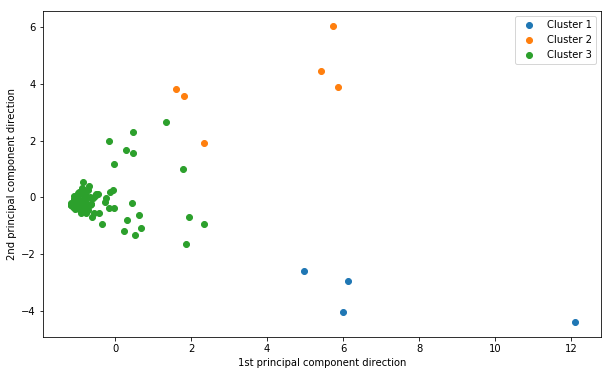

In [693]:
n = 3
kmeans = KMeans(n_clusters=n, random_state=0, n_jobs=-1, algorithm='full').fit(X)

l = []
for i in np.arange(n):
    l.append([])
for i,value in enumerate(kmeans.labels_):
    for j in np.arange(n):
        if value == j:
            l[j].append(i)
# each element of the list l is a list contains the row numbers of characters belonging to the same cluster
X_result = PCA().fit_transform(X)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
for i in np.arange(n):
    ax.scatter(X_result[l[i],0], X_result[l[i],1], label='Cluster '+str(i+1))

ax.set_xlabel('1st principal component direction')
ax.set_ylabel('2nd principal component direction')
ax.legend()
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.savefig('pictures/character_cluster.png')
plt.show()

In [694]:
# get names of each cluster
nn = np.zeros((n,kmeans.labels_.shape[0]))-1
for i,value in enumerate(kmeans.labels_):
    for j in np.arange(n):
        if value == j:
            nn[j,i] = np.int(data_org_new[i,-1])

for i,cluster in enumerate(nn):
    CRED = '\033[91m'
    CEND = '\033[0m'
    print(CRED+'Cluster '+str(i+1)+CEND)
    for ID in cluster:
        if ID > -1:
            get_character_name(int(ID))

Cluster 1
贾宝玉

薛宝钗

林黛玉

袭人

Cluster 2
贾政

贾琏

史太君

王夫人

王熙凤

邢夫人

Cluster 3
贾演

贾代儒

贾赦

贾珍

贾珠

贾环

贾瑞

贾琮

贾元春

贾迎春

贾探春

贾惜春

贾蓉

贾兰

贾蔷

贾芸

贾芹

贾巧姐

史湘云

王子腾

王仁

薛姨妈

薛蟠

薛蝌

薛宝琴

尤氏

李纨

秦氏

香菱

妙玉

赵姨娘

刘姥姥

媚人

晴雯

麝月

秋纹

碧浪

春燕

司棋

彩屏

翠墨

紫鹃

雪雁

鸳鸯

琥珀

莺儿

平儿

小红

丰儿

玉钏

彩云

彩霞

小螺

茗烟

李贵

锄药

来旺

兴儿

芳官

龄官

蕊官

藕官

荳官

葵官

顽石

茫茫大士

渺渺真人

甄士隐

封氏

贾雨村

李嬷嬷

板儿

周瑞家的

秦钟

冯紫英

赖大

林之孝

花自芳

林之孝家的

马道婆

周姨娘

王济仁

蒋玉菡

宋嬷嬷

邢岫烟

李婶娘

李纹

李绮

柳家的

柳五儿

尤二姐

尤三姐

尤老娘

秋桐

夏金桂



# 4.2 Event

In [695]:
# These whole events can be divided into 3 clusters.
# Cluster 1: The rise and fall of the whole family (focusing on the effects from outer environment)
# Cluster 2: The love story between Baoyu and his lovers
# Cluster 3: The daily management affairs centered on Wang Xifeng

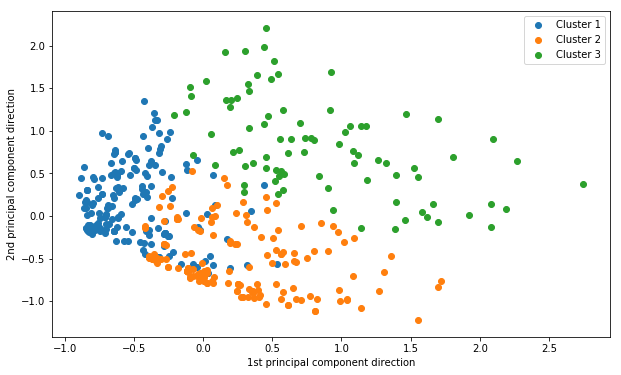

In [696]:
n = 3
kmeans = KMeans(n_clusters=n, random_state=0, n_jobs=-1, algorithm='full').fit(X.T)

l = []
for i in np.arange(n):
    l.append([])
for i,value in enumerate(kmeans.labels_):
    for j in np.arange(n):
        if value == j:
            l[j].append(i)
# each element of the list l is a list contains the row numbers of characters belonging to the same cluster
X_result = PCA().fit_transform(X.T)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
for i in np.arange(n):
    ax.scatter(X_result[l[i],0], X_result[l[i],1], label='Cluster '+str(i+1))

ax.set_xlabel('1st principal component direction')
ax.set_ylabel('2nd principal component direction')
ax.legend()
#ax.set_title('Void ratio vs. axial strain')
#plt.axis([0,110,0,0.15])
plt.savefig('pictures/Event_cluster.png')
plt.show()

In [697]:
# get names of each cluster
nn = np.zeros((n,kmeans.labels_.shape[0]))-1
for i,value in enumerate(kmeans.labels_):
    for j in np.arange(n):
        if value == j:
            nn[j,i] = np.int(data_org_new[-1,i])

for i,cluster in enumerate(nn):
    CRED = '\033[91m'
    CEND = '\033[0m'
    print(CRED+'Cluster '+str(i+1)+CEND)
    for ID in cluster:
        if ID > -1:
            get_event_name(int(ID))

Cluster 1
点化顽石

抄写石头记

下凡

贾雨村做客

资助雨村

英莲失踪

甄家破败

士隐出家

雨村报恩

雨村教书

黛玉进京

薄命女偏逢薄命郎葫芦僧乱判葫芦案

？

？

？

？

？

十章一 金荣家

十章二 宁府

十章三 给秦氏诊脉

见熙凤贾瑞起淫心

众人宴罢园中看戏

王熙凤毒设相思局

贾天祥正照风月鉴

秦可卿托梦

净虚奉承求凤姐

金哥儿投河殉情

夏守忠降旨荣国府

王熙凤拨冗接贾琏

赵嬷嬷为儿求凤姐

贾蔷接事回贾琏

聘买尼姑

贵妃游园

贵妃看戏

贵妃回銮

李嬷嬷为酥酪吵架

赵姨娘斥贾环

贾琏其人

商议庆生

选小和尚总管

赵姨娘养小人

红玉和佳蕙聊天

红玉偶遇贾芸

祭饯花神

宝钗扑蝶

宝钗偷听

凤姐认女

道士冲撞

宝玉调情

宝玉踢袭人

贾政询问贾环，贾环小动唇舌

薛姨妈责问薛蟠

怡红院内金钗偶遇

鹦哥戏逗黛玉

薛蟠道歉

花袭人借机问月钱

刘姥姥又见巧平儿

刘姥姥初见史太君

刘姥姥误入宝玉房

刘姥凤姐谈昨遇

贾母瞧病

邀凤姐入诗社

赖嬷嬷叙旧

宝钗看望黛玉

邢夫人请凤姐帮纳鸳鸯

邢夫人见鸳鸯

金嫂游说后的商讨

贾赦唤金文翔游说鸳鸯

贾赫纳妾

宝钗劝薛姨妈勿溺爱薛蟠

薛蟠外出学做买卖

香菱搬至宝钗园与其作伴

香菱拜师黛玉苦吟诗

香菱作诗

‘众人吟诗众评议'

‘凤姐张罗袭人出'

给贾母准备礼物

王夫人托宝钗照料家事

李纨,探春与吴媳妇讨论丧钱

探春-赵姨娘争执丧钱

探春回应平儿丧钱之事

探春询问摆饭

平儿训斥纵媳妇

平儿阻止秋纹回话

午饭闲余谈论利息之事

宝钗得体建议众老妈分工

四姑娘向贾母请安

四姑娘与贾母笑谈两宝玉

贾宝玉史湘云争论两宝玉

贾宝玉梦遇甄宝玉

料理内务外务

遣返十二女戏子

宝玉去看黛玉，路遇藕官烧纸

芳官顶撞主人

宝玉向芳官询问藕官的事

五十九回场景3

五十九回场景4

五十九回场景5

六十回场景2

六十回场景3

六十回场景4

柳氏与莲花儿抢白，司棋大闹厨房

五儿被疑为贼遭软禁

平儿查明真相

凤姐施罚平儿劝阻

五儿事情了结，贾环误会彩云

憨湘云醉眠芍药茵

占花名儿

行令吃酒

改名

扮男装

开丧破孝

下恩旨

料理丧事

抓子儿

奠祭

